In [1]:
import TurbPy as tb
from TurbPy.imports import *

In [2]:
# deck = 'KH_Lv1di/'
# deck  = 'KH/'
# deck = 'KH_subash/'
# deck = 'KH_new/'
# deck = 'KH_beta0.1/'
# deck = 'turb2/'
# deck = 'turb_vth0.01/'
# deck = 'KH_800ppc/'
deck = 'KH_400ppc_500int/'

dirs = '/pscratch/sd/g/goodwill/' + deck
figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
en_out = tb.read_energies(dirs)

twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twce = np.linspace(0, times[-1] * info['dt*wce'], len(times))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))

lx = info['Lx/di']
ly = info['Ly/di']
nx = int(info['nx'])
ny = int(info['ny'])

dt = info['dt*wpe'] * info['fields_interval']

In [3]:
# ps_av  = np.zeros(len(times))
# pid_av = np.zeros(len(times))
# pth_av = np.zeros(len(times))
# for t in np.arange(len(times)):
#   pth, pid = tb.ps_calc(dirs, times[t], sp , norm = False)
#   ps = pth + pid
#   pid_av[t] = np.average(pid)
#   pth_av[t] = np.average(pth)
#   # psi = psi/psi_rms
#   ps_av[t] = pid_av[t] + pth_av[t]

In [4]:
print(twci)

[ 0.         0.1381068  0.2762136  0.4143204  0.5524272  0.690534
  0.8286408  0.9667476  1.1048544  1.2429612  1.381068   1.5191748
  1.6572816  1.7953884  1.9334952  2.071602   2.2097088  2.3478156
  2.4859224  2.6240292  2.762136   2.9002428  3.0383496  3.1764564
  3.3145632  3.45267    3.5907768  3.7288836  3.8669904  4.0050972
  4.143204   4.2813108  4.4194176  4.5575244  4.6956312  4.833738
  4.9718448  5.1099516  5.2480584  5.3861652  5.524272   5.6623788
  5.8004856  5.9385924  6.0766992  6.214806   6.3529128  6.4910196
  6.6291264  6.7672332  6.90534    7.0434468  7.1815536  7.3196604
  7.4577672  7.595874   7.7339808  7.8720876  8.0101944  8.1483012
  8.286408   8.4245148  8.5626216  8.7007284  8.8388352  8.976942
  9.1150488  9.2531556  9.3912624  9.5293692  9.667476   9.8055828
  9.9436896 10.0817964 10.2199032 10.35801   10.4961168 10.6342236
 10.7723304 10.9104372 11.048544  11.1866508 11.3247576 11.4628644
 11.6009712 11.739078  11.8771848 12.0152916 12.1533984 12.291505

In [5]:
en_out = tb.read_energies(dirs)

In [6]:
## Calculate ###
sp = 'electron'
ps_av = tb.ps_av(dirs, sp)
sp = 'ion'
ps_av = tb.ps_av(dirs, sp)
en = tb.en_calc(dirs)

In [7]:
# ### Read ###
sp = 'electron'
dse = pd.read_csv(dirs + f'ps{sp[0]}_av.csv', delimiter = ',')
pse_av = dse[f'PS{sp[0]}']

sp = 'ion'
dsi = pd.read_csv(dirs + f'ps{sp[0]}_av.csv', delimiter = ',')
psi_av = dsi[f'PS{sp[0]}']
en = tb.read_calc_energies(dirs)

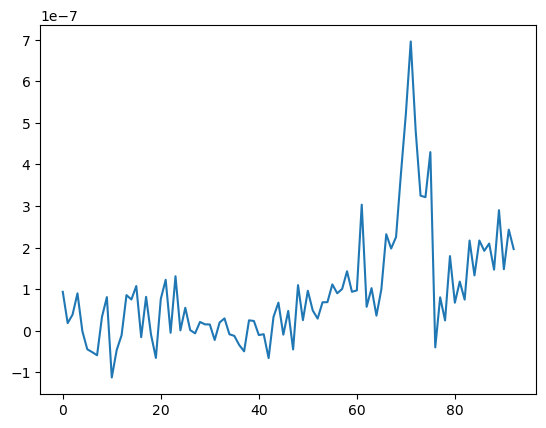

In [8]:
plt.plot(pse_av)

In [9]:
# ps_int = sci.integrate.cumulative_trapezoid(ps_av, initial = 0)
pse_int = np.cumsum(pse_av) * dt
psi_int = np.cumsum(psi_av) * dt

In [10]:
# n = 0
# time_twci = np.round(twci[n],1)
# print(time_twci)
# dpse = pse_int
# dpsi = psi_int
# sp = 'e'
# dEthe = (en[f'Eth{sp[0]}'] - en[f'Eth{sp[0]}'][n])/((info['Lx/de'] * info['Ly/de'] * info['Lz/de']))
# # dEthi = en['Ethi'] - en['Ethi'][0]

In [11]:
n = 10
time_twci = np.round(twci[n],1)
print(time_twci)
dpse = pse_int - pse_int[n]
dpsi = psi_int - psi_int[n]
sp = 'e'
dEthe = (en[f'Eth{sp[0]}'] - en[f'Eth{sp[0]}'][n])/((info['Lx/de'] * info['Ly/de'] * info['Lz/de']))
sp = 'i'
dEthi = (en[f'Eth{sp[0]}'] - en[f'Eth{sp[0]}'][n])/((info['Lx/de'] * info['Ly/de'] * info['Lz/de']))
# dEthi = en['Ethi'] - en['Ethi'][0]

1.4


ValueError: x and y must have same first dimension, but have shapes (321,) and (93,)

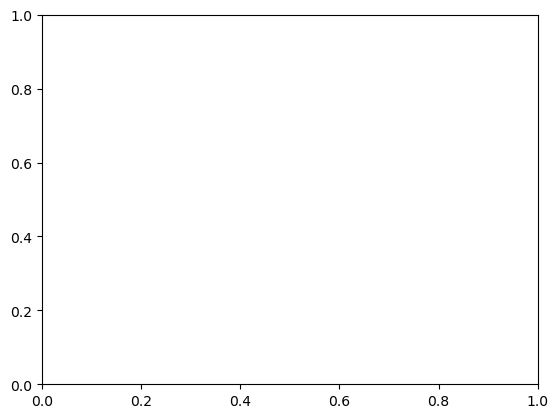

In [12]:
sp = 'e'
plt.plot(twci, dpse ,marker = 'x', label = r'$\int_{'f'{time_twci}'r'}^t PS^'f'{sp[0]}'' dt$')
plt.plot(twci, dEthe,marker = 'x', label = r'$\delta E_{th}^'f'{sp[0]}''$')
plt.ylabel(r'$\delta E \left[ \frac{m_e c^2}{d_e^3}\right]$')
plt.xlabel(r'$t \omega_{ci}  \left[ \frac{e B_0}{m_i c} \right]$')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(figs + f'ps{sp[0]}_dEth{sp[0]}.jpg', dpi = 400)

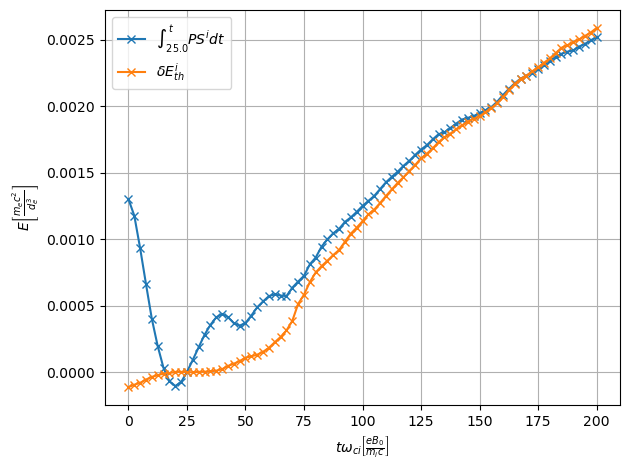

In [ ]:
sp = 'i'
plt.plot(twci, dpsi, marker = 'x', label = r'$\int_{'f'{time_twci}'r'}^t PS^'f'{sp[0]}'' dt$')
plt.plot(twci, dEthi,marker = 'x', label = r'$\delta E_{th}^'f'{sp[0]}''$')
plt.ylabel(r'$E \left[ \frac{m_e c^2}{d_e^3}\right]$')
plt.xlabel(r'$t \omega_{ci}  \left[ \frac{e B_0}{m_i c} \right]$')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(figs + f'ps{sp[0]}_dEth{sp[0]}.jpg', dpi = 400)

In [ ]:
ds = pd.read_csv(dirs + 'JE_av.csv')

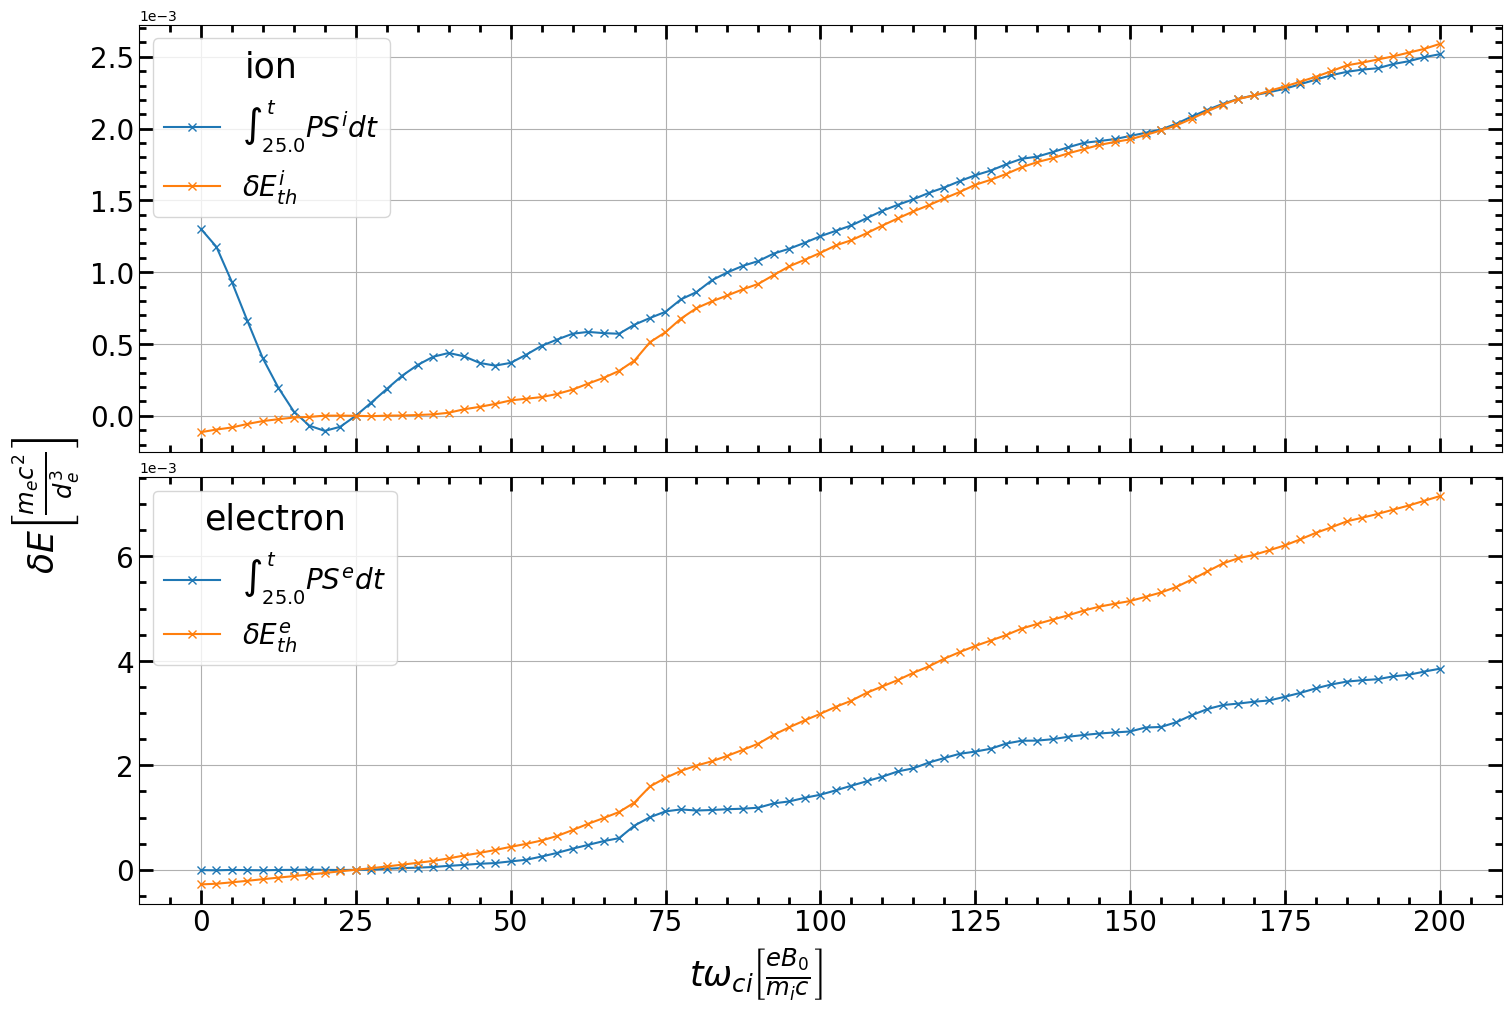

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(15, 10), sharex = True, layout='constrained')
sp = 'ion'
axs[0].plot(twci, dpsi, marker = 'x', label = r'$\int_{'f'{time_twci}'r'}^t PS^'f'{sp[0]}'' dt$')
axs[0].plot(twci, dEthi,marker = 'x', label = r'$\delta E_{th}^'f'{sp[0]}''$')
axs[0].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[0].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[0].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[0].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[0].legend(title = sp, title_fontsize = 25, loc = 'upper left', fontsize = 20)
axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].tick_params(which='both', width=2, labelsize = 20, right = True, direction = 'in')
axs[0].tick_params(which='major', length=10, top = True, right =True)
axs[0].tick_params(which='minor', length=5 , top = True, right =True)
axs[0].grid()

sp = 'electron'
axs[1].plot(twci, dpse, marker = 'x', label = r'$\int_{'f'{time_twci}'r'}^t PS^'f'{sp[0]}'' dt$')
axs[1].plot(twci, dEthe,marker = 'x', label = r'$\delta E_{th}^'f'{sp[0]}''$')
axs[1].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[1].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[1].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[1].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[1].legend(title = sp, title_fontsize = 25, loc = 'upper left', fontsize = 20)
axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1].tick_params(which='both', width=2, labelsize = 20, right = True, direction = 'in')
axs[1].tick_params(which='major', length=10, top = True, right =True)
axs[1].tick_params(which='minor', length=5 , top = True, right =True)
axs[1].grid()

fig.supylabel(r'$\delta E \left[ \frac{m_e c^2}{d_e^3} \right] $', size = 25)
fig.supxlabel(r'$ t \omega_{ci} \left[ \frac{e B_0}{m_i c} \right]$', size = 25)

plt.savefig(figs + 'PS_dEth.jpg', dpi = 400)

In [ ]:
deck = 'KH_400ppc/'
dirs = '/pscratch/sd/g/goodwill/' + deck
figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info4 = tb.get_vpic_info(dirs)
times4 = tb.get_times(dirs)
en_out = tb.read_energies(dirs)

twci_out4 = np.linspace(0, times4[-1] * info['dt*wci'], len(en_out['EM']))
twce4 = np.linspace(0, times4[-1] * info4['dt*wce'], len(times4))
twci4 = np.linspace(0, times4[-1] * info4['dt*wci'], len(times4))

lx = info['Lx/di']
ly = info['Ly/di']
nx = int(info['nx'])
ny = int(info['ny'])

dt = info4['dt*wpe'] * info4['fields_interval']

In [ ]:
sp = 'electron'
dse4 = pd.read_csv(dirs + f'ps{sp[0]}_av.csv', delimiter = ',')
pse_av4 = dse4[f'PS{sp[0]}']

sp = 'ion'
dsi4 = pd.read_csv(dirs + f'ps{sp[0]}_av.csv', delimiter = ',')
psi_av4 = dsi4[f'PS{sp[0]}']
en4 = tb.read_calc_energies(dirs)

In [ ]:
n = 0
pse_int4 = np.cumsum(pse_av4) * dt
psi_int4 = np.cumsum(psi_av4) * dt
sp = 'electron'
dEthe4 = (en4[f'Eth{sp[0]}'] - en4[f'Eth{sp[0]}'][n])/((info['Lx/de'] * info['Ly/de'] * info['Lz/de']))
sp = 'ion'
dEthi4 = (en4[f'Eth{sp[0]}'] - en4[f'Eth{sp[0]}'][n])/((info['Lx/de'] * info['Ly/de'] * info['Lz/de']))
dpse4 = pse_int4 - pse_int4[n]
dpsi4 = psi_int4 - psi_int4[n]

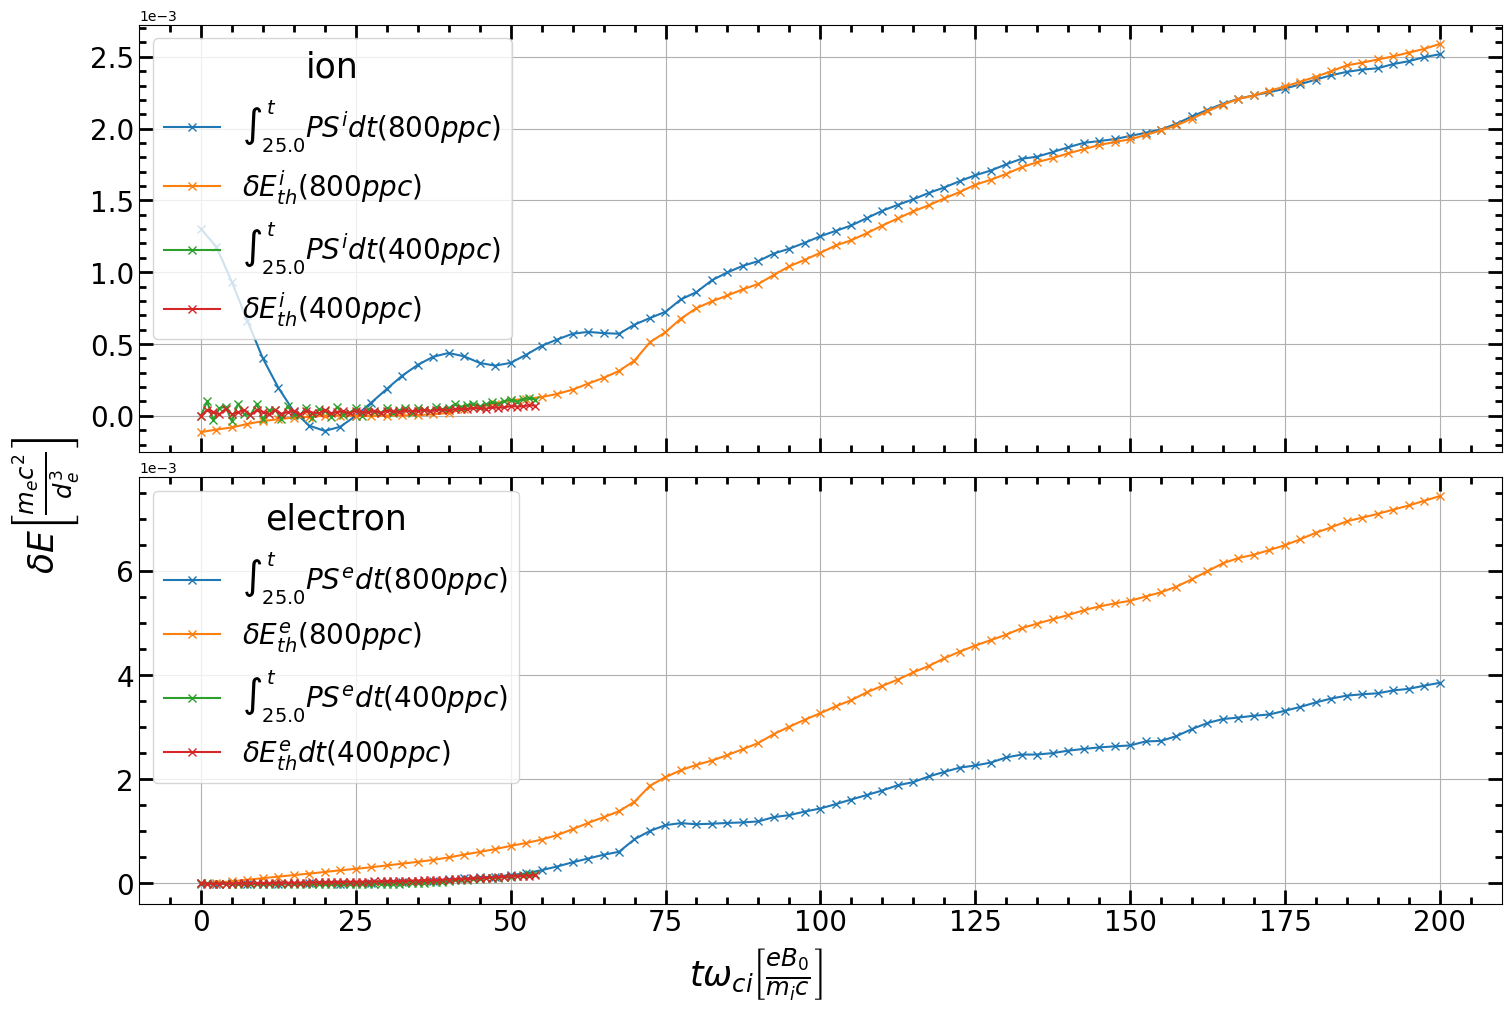

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(15, 10), sharex = True, layout='constrained')
sp = 'ion'
nppc = int(info['nppc'])
axs[0].plot(twci, dpsi, marker = 'x', label = r'$\int_{'f'{time_twci}'r'}^t PS^'f'{sp[0]} dt({nppc} ppc)$')
axs[0].plot(twci, dEthi,marker = 'x', label = r'$\delta E_{th}^'f'{sp[0]} ({nppc} ppc)$')

nppc4 = int(info4['nppc'])
axs[0].plot(twci4, dpsi4, marker = 'x', label = r'$\int_{'f'{time_twci}'r'}^t PS^'f'{sp[0]} dt({nppc4} ppc)$')
axs[0].plot(twci4, dEthi4,marker = 'x', label = r'$\delta E_{th}^'f'{sp[0]} ({nppc4} ppc)$')
axs[0].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[0].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[0].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[0].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[0].legend(title = sp, title_fontsize = 25, loc = 'upper left', fontsize = 20)
axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].tick_params(which='both', width=2, labelsize = 20, right = True, direction = 'in')
axs[0].tick_params(which='major', length=10, top = True, right =True)
axs[0].tick_params(which='minor', length=5 , top = True, right =True)
axs[0].grid()

sp = 'electron'
nppc = int(info['nppc'])
axs[1].plot(twci, dpse, marker = 'x', label = r'$\int_{'f'{time_twci}'r'}^t PS^'f'{sp[0]} dt({nppc} ppc)$')
axs[1].plot(twci, dEthe,marker = 'x', label = r'$\delta E_{th}^'f'{sp[0]}'f'({nppc} ppc)$')

nppc4 = int(info4['nppc'])
axs[1].plot(twci4, dpse4, marker = 'x', label = r'$\int_{'f'{time_twci}'r'}^t PS^'f'{sp[0]} dt({nppc4} ppc)$')
axs[1].plot(twci4, dEthe4,marker = 'x', label = r'$\delta E_{th}^'f'{sp[0]}'f'dt({nppc4} ppc)$')
axs[1].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[1].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[1].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[1].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[1].legend(title = sp, title_fontsize = 25, loc = 'upper left', fontsize = 20)
axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1].tick_params(which='both', width=2, labelsize = 20, right = True, direction = 'in')
axs[1].tick_params(which='major', length=10, top = True, right =True)
axs[1].tick_params(which='minor', length=5 , top = True, right =True)
axs[1].grid()

fig.supylabel(r'$\delta E \left[ \frac{m_e c^2}{d_e^3} \right] $', size = 25)
fig.supxlabel(r'$ t \omega_{ci} \left[ \frac{e B_0}{m_i c} \right]$', size = 25)

plt.savefig(figs + 'PS_dEth.jpg', dpi = 400)